### 1.  Start your portfolio environment by watching the two portfolio videos, installing Docker, downloading the jupyterlab docker image, obtain a dockerhub login and github login.  Enter your two login ids with this assignment along with a snapshot of the successful jupyter lab browser page.


#### Docker ID:  eyi5
#### Github ID:  CY0218


### 2.  For the set of input images for a YOLO classifier, perform image resizing and normalization. Use mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225] to "center" your data.  Turn in your Ipython notebook file that was used for image preprocessing.  Next week you can add to your remote github repository.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [2]:
 # change color channels order for matplotlib     
def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    plt.show()

### Converting an image to gray scale

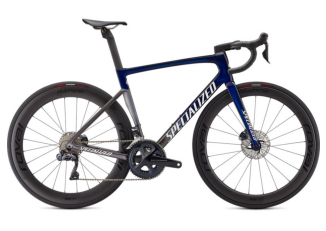

In [3]:
img = cv2.imread('BikeShot3 12.59.28 PM.jpg')
plot_cv_img(img)

In [4]:
img = cv2.imread('BikeShot3 12.59.28 PM.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

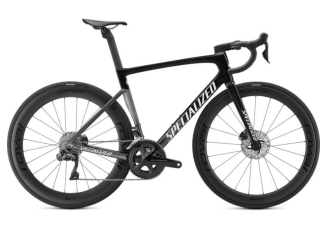

In [5]:
plot_cv_img(gray)

In [11]:
gray.shape

(640, 920)

### Filtering


In [12]:
#Lets generate noise with Open CV
# initialize noise image with zeros
noise = np.zeros((640, 920))

# fill the image with random numbers in given range
cv2.randu(noise, 0, 256)

array([[141.32240455, 170.74795825, 206.710849  , ...,  78.97224051,
         33.79124068,  24.82344649],
       [ 13.91639093,  37.77654889,  82.33237497, ..., 251.96971753,
         50.01442239, 124.44641594],
       [134.73990708, 208.85750294, 226.35277661, ..., 232.89802746,
        154.86055466, 178.66505755],
       ...,
       [153.08816624, 194.51326746,   3.96544983, ..., 205.95671805,
        197.62001248,  93.00521721],
       [190.37441235, 124.67759557, 187.09091848, ...,  67.91795394,
         44.44331478,  13.46248517],
       [  4.89357099, 171.96030864,  93.99855948, ..., 232.89224394,
        128.68102839, 248.63400763]])

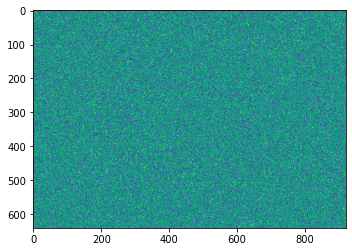

In [13]:
plt.imshow(noise)

In [14]:
noisy_gray = gray + np.array(0.2*noise, dtype=np.int)

<ipython-input-14-ed5796206232>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_gray = gray + np.array(0.2*noise, dtype=np.int)


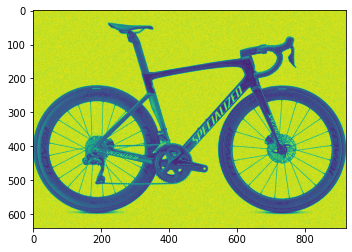

In [15]:
plt.imshow(noisy_gray)

### Linear Filter 

<ipython-input-17-7584147c8980>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.asarray(img, dtype=np.float)
<ipython-input-17-7584147c8980>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.asarray(img

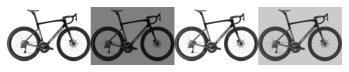

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

def point_operation(img, K, L):
    """
    Applies point operation to given grayscale image
    """
    img = np.asarray(img, dtype=np.float)
    img = img*K + L
    # clip pixel values
    img[img > 255] = 255 
    img[img < 0] = 0
    return np.asarray(img, dtype = np.int)

def main():
    # read an image 
    img = cv2.imread('BikeShot3 12.59.28 PM.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # k = 0.5, l = 0
    out1 = point_operation(gray, 0.5, 0)

    # k = 1., l = 10
    out2 = point_operation(gray, 1., 10)

    # k = 0.8, l = 15
    out3 = point_operation(gray, 0.7, 25)
    
    res = np.hstack([gray,out1, out2, out3])
    plt.imshow(res, cmap='gray')
    plt.axis('off')

    plt.show()


if __name__ == '__main__':
    main()

# Image Resizing

In [18]:
# Source Image Size
img = cv2.imread('BikeShot3 12.59.28 PM.jpg')
dimensions = img.shape
 
    # height, width, number of channels in image

height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
print(height, width, channels)

640 920 3


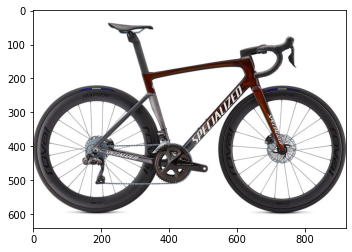

In [19]:
plt.imshow(img)

In [20]:
# Resizing of Image
# dsize
src=img
dsize = (425, 425)

# resize image
output = cv2.resize(src, dsize, interpolation = cv2.INTER_AREA)
height = output.shape[0]
width = output.shape[1]
print(height, width)

425 425


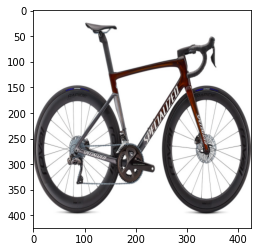

In [21]:
plt.imshow(output)

# Normalization

In [22]:
output

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
import numpy as np

def normalize_image(image):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    image_norm = image / 255.0
    image_norm = (image_norm - mean) / std
    
    return image_norm


In [28]:
normed_image = normalize_image(output)

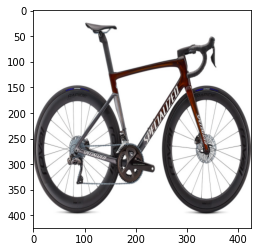

In [29]:
plt.imshow(output)

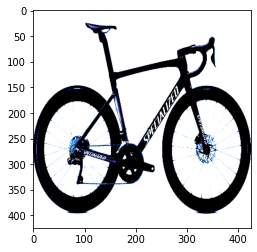

In [30]:
plt.imshow(normed_image)